# Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.patches import Patch
import numpy as np
import config
import re
import os

# Load data

In [7]:
metadata = pd.read_csv(os.path.join(config.METADATA), sep="\t", index_col=0)
metadata["date_time"] = pd.to_datetime(metadata['Date_Collected'])
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,date_time
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,2016-12-10
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,2016-12-15
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,2016-12-15
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,2016-12-15
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,2016-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2021-08-22
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2021-09-06
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,2021-08-23


In [8]:
species = pd.read_csv(config.SPECIES, sep="\t", index_col=0)
species

,magic.0007,magic.0008,magic.0010,magic.0012,magic.0014,magic.0017,magic.0019,magic.0022,magic.0023,magic.0024,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,105,1,3533,58,44507,100,89,159,1786,82222,...,5,6,6,13,19,7,6,6,7,15
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,228,144,148,526,15062,97,15848,910,878,0,...,32,7468,16,21,5,312,7,14,8,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,39403,23646,26439,80131,760790,11451,846753,253540,1080,28,...,14553,511,1352,92,6788,283,31,2493,1280,22
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,925,537,2166,1518,5379,237,5751,21371,14,0,...,359,12,173,1,1173,7,9,43,87,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,170947,107325,19611,367871,34244,53225,33157,188699,406,33,...,2913,152,1238,49,12137,64,60,219,758,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Display sampling points

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68091/1394009021.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_points[plot_points.isna() | (plot_points == "na")] = subject_df["calc_age_mo"] * 4


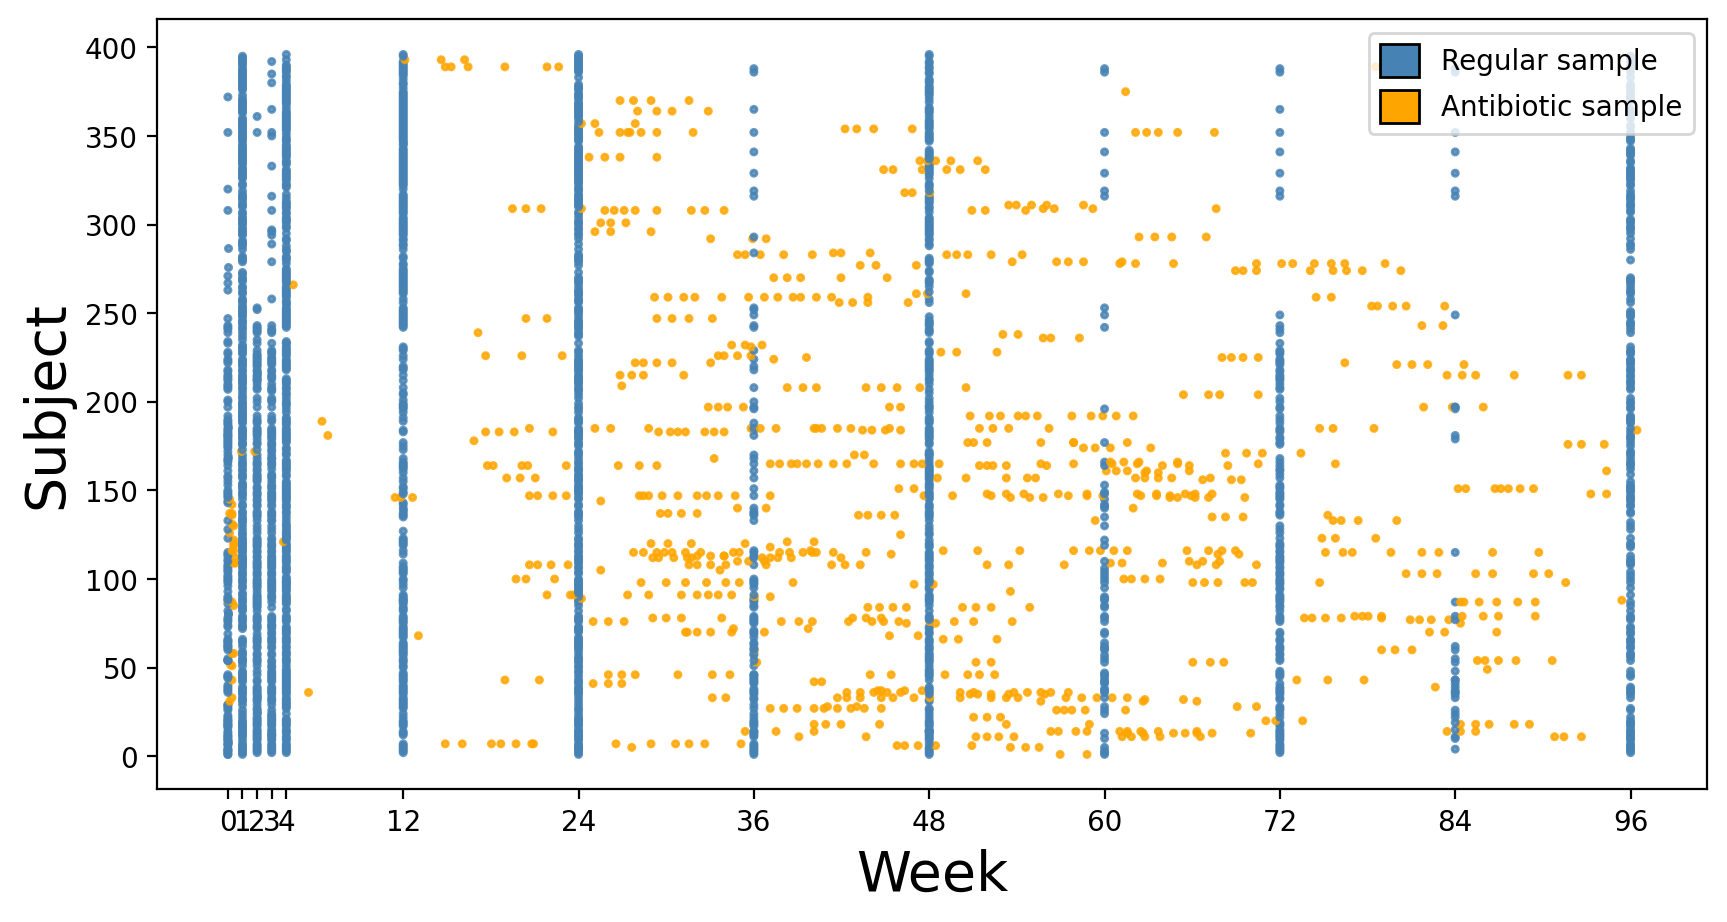

In [10]:
plt.figure(figsize=(10, 5), dpi=200)

normal_color = "steelblue"
abx_color = "orange"

for i, subject in enumerate(metadata["Patient_No"].unique()):
# for i, subject in enumerate(sorted_patients):
    subject_df = metadata[metadata["Patient_No"] == subject].sort_values("date_time")
    subject_df = subject_df[~subject_df["Date_Collected"].isna()]
    
    plot_points = subject_df["Timeline_Weeks"]
    color = subject_df["Timeline_Weeks"].copy()
    color[~color.isna() & (color != "na")] = normal_color
    color[color.isna() | (color == "na")] = abx_color
    
    plot_points[plot_points.isna() | (plot_points == "na")] = subject_df["calc_age_mo"] * 4
    
    plt.scatter(plot_points.astype(float), [i + 1] * plot_points.shape[0], c=color, alpha=0.8, s=5)
    
handles = [
    Patch(facecolor=normal_color, edgecolor="k", label="Regular sample"),
    Patch(facecolor=abx_color, edgecolor="k", label="Antibiotic sample"),
]
plt.legend(handles=handles, prop={'size': 10}, loc=1, handlelength=1.4, handleheight=1.4)
    
plt.ylabel("Subject", fontsize=20)
plt.xlabel("Week", fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 12, 24, 36, 48, 60, 72, 84, 96])
    
plt.savefig(os.path.join(config.FIGURE_DIR, "samples.pdf"))
plt.show()

# Display demographics

In [11]:
metadata = metadata.loc[species.columns]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,date_time
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,2016-12-15
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,2016-12-15
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673,2016-12-10
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,Vaginal,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772,2016-12-22
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,Vaginal,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610,2016-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2021-08-22
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2021-09-06
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,2021-08-23
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641,2021-07-21


In [12]:
races = metadata["motherrace"].copy()
races[races.isna()] = "Unknown"

In [13]:
race_labels, race_counts = np.unique([str(s) for s in races], return_counts=True)
race_labels                                                                                                                                   

array(['Asian', 'Black or African American', 'More than one race',
       'Native Hawaiian or Other Pacific Islander', 'Unknown', 'White'],
      dtype='<U41')

In [14]:
race_labels = [f"{lab}\n({race_counts[i]})" for i, lab in enumerate(race_labels)]
race_labels

['Asian\n(288)',
 'Black or African American\n(280)',
 'More than one race\n(163)',
 'Native Hawaiian or Other Pacific Islander\n(5)',
 'Unknown\n(30)',
 'White\n(2413)']

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68091/1083462108.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(race_labels))


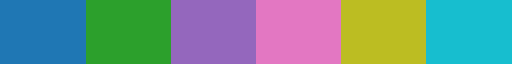

In [15]:
from matplotlib import cm

colors = cm.get_cmap('tab10', len(race_labels))
colors

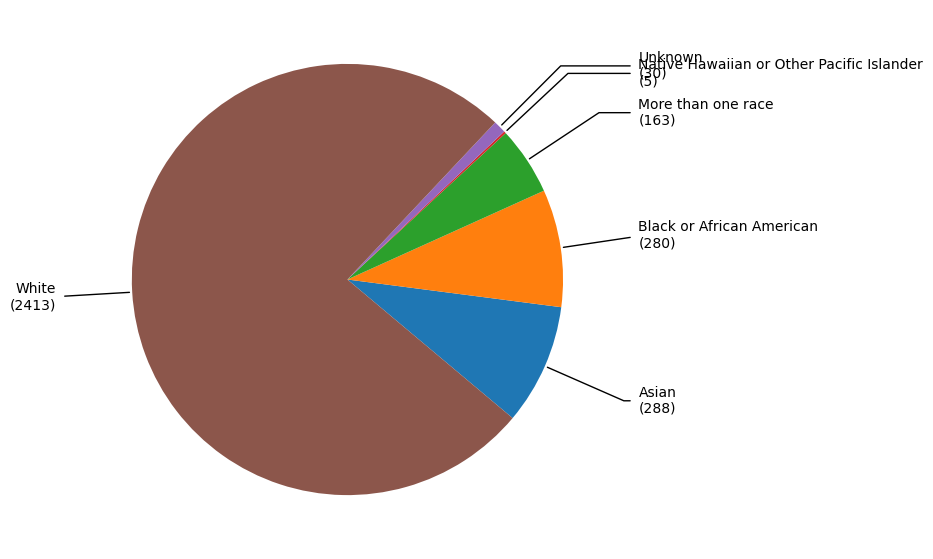

In [16]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie((race_counts), wedgeprops=dict(width=1), startangle=-40)

bbox_props = dict(fc="none", ec="none", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate((race_labels)[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
plt.savefig(os.path.join(config.FIGURE_DIR, "race.pdf"))

plt.show()


In [17]:
abx_labels, abx_counts = np.unique(metadata["expo_cat1"], return_counts=True)

In [18]:
abx_labels = [f"{lab}\n({abx_counts[i]})" for i, lab in enumerate(abx_labels)]
abx_labels

['GBS antibiotics\n(460)',
 'No antibiotics\n(1589)',
 'Other antibiotics\n(1130)']

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68091/2737539351.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('cool', len(abx_labels))


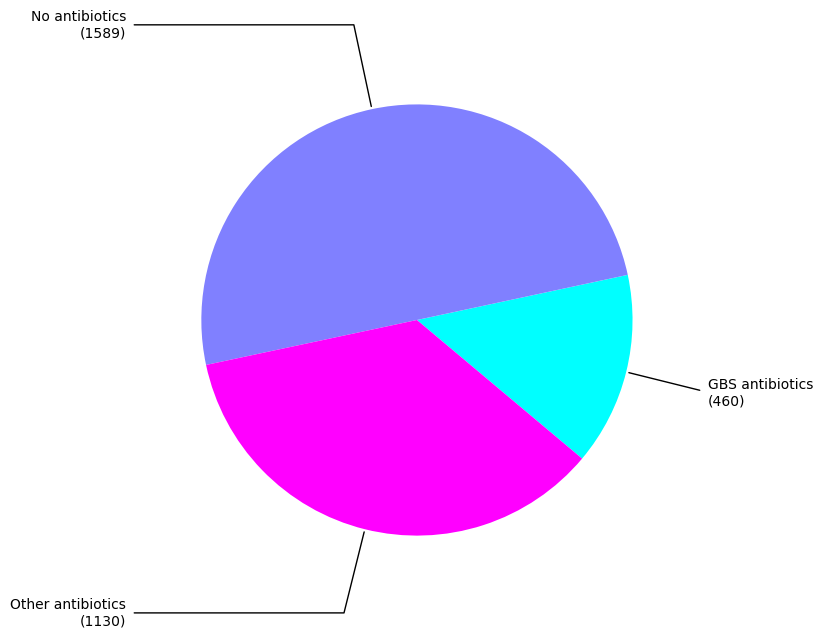

In [21]:
colors = cm.get_cmap('cool', len(abx_labels))

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie((abx_counts), wedgeprops=dict(width=1), startangle=-40, colors=[colors(i) for i in range(len(abx_labels))])

bbox_props = dict(fc="none", ec="none", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate((abx_labels)[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
plt.savefig(os.path.join(config.FIGURE_DIR, "antibiotics.pdf"))

plt.show()